# US-Accidents: A Countrywide Traffic Accident Dataset

This is a countrywide traffic accident dataset, which covers 49 states of the United States. The data is continuously being collected from February 2016, using several data providers, including two APIs which provide streaming traffic event data. These APIs broadcast traffic events captured by a variety of entities, such as the US and state departments of transportation, law enforcement agencies, traffic cameras, and traffic sensors within the road-networks. Currently, there are about 3.5 million accident records in this dataset.

 - ID - This is a unique identifier of the accident record.
 - Source - Indicates source of the accident report (i.e. the API which reported the accident.).
 - TMC (Traffic Message Channel) - provides more detailed description of the event.
 - Severity - Shows the severity of the accident, a number between 1 and 4, where 1 indicates the least impact on traffic (i.e., short delay as a result of the accident) and 4 indicates a significant impact on traffic (i.e., long delay).
 - Start_Time - Shows start time of the accident in local time zone.
 - End_Time - Shows end time of the accident in local time zone. End time here refers to when the impact of accident on traffic flow was dismissed.
 - Start_Lat - Shows latitude in GPS coordinate of the start point.
 - Start_Lng - Shows longitude in GPS coordinate of the start point.
 - End_Lat - Shows latitude in GPS coordinate of the end point.
 - End_Lng - Shows longitude in GPS coordinate of the end point.
 - Distance(mi) - The length of the road extent affected by the accident.
 - Description - Shows natural language description of the accident.
 - Number - Shows the street number in address field.
 - Street - Shows the street name in address field.
 - Side - Shows the relative side of the street (Right/Left) in address field.
 - City - Shows the city in address field.
 - County - Shows the county in address field.
 - State - Shows the state in address field.
 - Zipcode - Shows the zipcode in address field.
 - Country - Shows the country in address field.
 - Timezone	 - Shows timezone based on the location of the accident (eastern, central, etc.).
 - Airport_Code - Denotes an airport-based weather station which is the closest one to location of the accident.
 - Weather_Timestamp - Shows the time-stamp of weather observation record (in local time).
 - Temperature(F) - Shows the temperature (in Fahrenheit).
 - Wind_Chill(F) - Shows the wind chill (in Fahrenheit).
 - Humidity(%) - Shows the humidity (in percentage).
 - Pressure(in) - Shows the air pressure (in inches).
 - Visibility(mi) - Shows visibility (in miles).
 - Wind_Direction - Shows wind direction.
 - Wind_Speed(mph) - Shows wind speed (in miles per hour).
 - Precipitation(in) - Shows precipitation amount in inches, if there is any.
 - Weather_Condition - Shows the weather condition (rain, snow, thunderstorm, fog, etc.)
 - [Amenity, Bump, Crossing, Give_Way, Junction, No_Exit, Railway, Roundabout, Station, Stop, Traffic_Calming, Traffic_Signal, Turning_Loop] - A POI annotation which indicates presence in a nearby location.
 - Sunrise_Sunset - Shows the period of day (i.e. day or night) based on sunrise/sunset.
 - Civil_Twilight - Shows the period of day (i.e. day or night) based on civil twilight.
 - Nautical_Twilight - Shows the period of day (i.e. day or night) based on nautical twilight.
 - Astronomical_Twilight - Shows the period of day (i.e. day or night) based on astronomical twilight.

## Data preparation and preprocessing

In [70]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
from sklearn.cluster import KMeans
from fbprophet import Prophet

import warnings
 
warnings.filterwarnings('ignore')

In [71]:
pd.set_option('display.max_rows', 10)

In [72]:
#import dataset

#df = pd.read_csv('US_Accidents_June20.csv', parse_dates = True)
df = pd.read_csv('US_Accidents_June20.csv', index_col='ID', parse_dates=['Start_Time','End_Time'])

df

,Source,TMC,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
ID,,,,,,,,,,,,,,,,,,,,,
A-1,MapQuest,201.0,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,0.010,...,False,False,False,False,False,False,Night,Night,Night,Night
A-2,MapQuest,201.0,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,0.010,...,False,False,False,False,False,False,Night,Night,Night,Day
A-3,MapQuest,201.0,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,0.010,...,False,False,False,False,True,False,Night,Night,Day,Day
A-4,MapQuest,201.0,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,0.010,...,False,False,False,False,False,False,Night,Day,Day,Day
A-5,MapQuest,201.0,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,0.010,...,False,False,False,False,True,False,Day,Day,Day,Day
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
A-3513776,Bing,NaN,2,2019-08-23 18:03:25,2019-08-23 18:32:01,34.002480,-117.379360,33.99888,-117.37094,0.543,...,False,False,False,False,False,False,Day,Day,Day,Day
A-3513777,Bing,NaN,2,2019-08-23 19:11:30,2019-08-23 19:38:23,32.766960,-117.148060,32.76555,-117.15363,0.338,...,False,False,False,False,False,False,Day,Day,Day,Day
A-3513778,Bing,NaN,2,2019-08-23 19:00:21,2019-08-23 19:28:49,33.775450,-117.847790,33.77740,-117.85727,0.561,...,False,False,False,False,False,False,Day,Day,Day,Day


- 49 columns 
- 3.5 million rows/accidents

### Datetime format

In [73]:
df['Start_Time'] = pd.to_datetime(df['Start_Time'], format='%Y-%m-%d %H:%M:%S')

df['Year'] = df['Start_Time'].dt.year
df['Month'] = df['Start_Time'].dt.month
df['Day'] = df['Start_Time'].dt.day
df['Hour'] = df['Start_Time'].dt.hour
df['Weekday'] = df['Start_Time'].dt.weekday
df['Impact'] = (df['End_Time'] - df['Start_Time']).dt.total_seconds()/60
df["YMD"] = df["Start_Time"].dt.date
df["ds"] = df["Start_Time"].dt.date     # YMD
df['y'] = df['Severity']

### Feature types

In [74]:
# df.info()

In [75]:
numerical_features = ['Start_Lat','Start_Lng','Distance(mi)','Temperature(F)',
                     'Humidity(%)', 'Pressure(in)','Visibility(mi)','Wind_Speed(mph)','Precipitation(in)'] 

binary_features = ['Amenity', 'Bump', 'Crossing','Give_Way', 'Junction', 'No_Exit', 'Railway', 'Roundabout',
                   'Station','Stop', 'Traffic_Calming', 'Traffic_Signal', 'Sunrise_Sunset']

categorical_features = ['Street', 'Side', 'City', 'County', 'State','Timezone','Weather_Condition',
                       'Month', 'Year', 'Hour', 'Weekday', 'Day']

In [76]:
for i in df.columns:
    print(i, df[i].unique().size)

Source 3
TMC 22
Severity 4
Start_Time 3200042
End_Time 3246120
Start_Lat 1124695
Start_Lng 1113407
End_Lat 375075
End_Lng 383570
Distance(mi) 13476
Description 1780093
Number 40366
Street 176262
Side 3
City 11896
County 1724
State 49
Zipcode 418781
Country 1
Timezone 5
Airport_Code 2002
Weather_Timestamp 546087
Temperature(F) 832
Wind_Chill(F) 975
Humidity(%) 101
Pressure(in) 1023
Visibility(mi) 86
Wind_Direction 25
Wind_Speed(mph) 161
Precipitation(in) 262
Weather_Condition 128
Amenity 2
Bump 2
Crossing 2
Give_Way 2
Junction 2
No_Exit 2
Railway 2
Roundabout 2
Station 2
Stop 2
Traffic_Calming 2
Traffic_Signal 2
Turning_Loop 1
Sunrise_Sunset 3
Civil_Twilight 3
Nautical_Twilight 3
Astronomical_Twilight 3
Year 5
Month 12
Day 31
Hour 24
Weekday 7
Impact 28092
YMD 1601
ds 1601
y 4


### Useless features

In [77]:
df_copy = df.copy()
#df = df.drop(['Country', 'Turning_Loop', 'ID', 'TMC', 'Description', 'Street', 'City', 'County', 'Zipcode', 'Airport_Code', 'Weather_Timestamp', 'Wind_Chill(F)'], axis = 1)
df = df.drop(['Country', 'Turning_Loop', 'TMC', 'Description', 'Street', 'City', 'County', 'Zipcode', 'Airport_Code', 'Weather_Timestamp', 'Wind_Chill(F)'], axis = 1)

 - ID - id of each accident 
 - Country - only for USA
 - Turning_Loop - only one unique value
 - TMC - detailed description of the accident
 - Description - description of the event
 - Street, City, County - we will consider at the level of the state
 - Zipcode 
 - Airport_Code
 - Weather_Timestamp
 - Wind_Chill(F)

### Missing values

In [78]:
df.isna().sum()

Source        0
Severity      0
Start_Time    0
End_Time      0
Start_Lat     0
             ..
Weekday       0
Impact        0
YMD           0
ds            0
y             0
Length: 46, dtype: int64

In [79]:
#Missing values percentage
missing = pd.DataFrame(df.isnull().sum().reset_index())
missing.columns = ['Feature', 'Percentage']
missing['Percentage'] = missing['Percentage'].apply(lambda x: x / df.shape[0] * 100)
missing.loc[missing['Percentage']>0,:].sort_values(by="Percentage",ascending=False)

,Feature,Percentage
6,End_Lat,70.548896
7,End_Lng,70.548896
9,Number,64.402694
19,Precipitation(in),57.657793
18,Wind_Speed(mph),12.938490
...,...,...
12,Timezone,0.110428
33,Sunrise_Sunset,0.003273
34,Civil_Twilight,0.003273
35,Nautical_Twilight,0.003273


In [80]:
df = df.dropna()
df

,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Number,...,Astronomical_Twilight,Year,Month,Day,Hour,Weekday,Impact,YMD,ds,y
ID,,,,,,,,,,,,,,,,,,,,,
A-2478903,Bing,4,2016-02-09 18:20:58,2016-02-10 00:20:58,40.451120,-85.150480,40.354290,-85.149930,6.690,9001.0,...,Day,2016,2,9,18,1,360.000000,2016-02-09,2016-02-09,4
A-2478904,Bing,4,2016-02-09 18:20:58,2016-02-10 00:20:58,40.354290,-85.149930,40.451120,-85.150480,6.690,473.0,...,Day,2016,2,9,18,1,360.000000,2016-02-09,2016-02-09,4
A-2478908,Bing,4,2016-02-10 06:18:49,2016-02-10 12:18:49,40.728130,-84.789650,40.745590,-84.789620,1.206,12998.0,...,Day,2016,2,10,6,2,360.000000,2016-02-10,2016-02-10,4
A-2478911,Bing,2,2016-02-10 08:35:27,2016-02-10 14:35:27,41.831930,-80.101430,41.841490,-80.110990,0.824,25529.0,...,Day,2016,2,10,8,2,360.000000,2016-02-10,2016-02-10,2
A-2478928,Bing,2,2016-02-10 12:54:39,2016-02-10 18:54:39,41.483390,-81.662970,41.476920,-81.660750,0.462,3937.0,...,Day,2016,2,10,12,2,360.000000,2016-02-10,2016-02-10,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
A-3513737,Bing,3,2019-08-23 16:19:21,2019-08-23 16:48:04,37.609816,-122.493720,37.608821,-122.495261,0.109,895.0,...,Day,2019,8,23,16,4,28.716667,2019-08-23,2019-08-23,3
A-3513741,Bing,4,2019-08-23 17:25:12,2019-08-23 17:54:00,38.995930,-121.672020,39.003170,-121.662679,0.708,3044.0,...,Day,2019,8,23,17,4,28.800000,2019-08-23,2019-08-23,4
A-3513742,Bing,4,2019-08-23 17:25:12,2019-08-23 17:54:00,39.003170,-121.662679,38.995930,-121.672020,0.708,2500.0,...,Day,2019,8,23,17,4,28.800000,2019-08-23,2019-08-23,4


- clean dataset

In [81]:
# clean the data based on the condition that the impact on traffic is between zero-one week,and drop duplicates
one_week = 60*24*7
df_ts_clean = df_copy[(df_copy['Impact']>0) & (df_copy['Impact']< one_week)].drop_duplicates(subset=['Start_Time',
                                                                                   'End_Time',
                                                                                   'City',
                                                                                  'Street',
                                                                                   'Number',
                                                                                   'Description'])

In [82]:
df_ts = df_ts_clean[['Country',
                'Start_Time',
                'End_Time',
                'Year',
                'Month',
                'Weekday',
                'Hour',
                'Impact',
                'Severity']]

## Plots and interpretations 

In [83]:
df.nunique()

Source             1
Severity           4
Start_Time    128680
End_Time      133293
Start_Lat      82269
               ...  
Weekday            7
Impact         10078
YMD             1478
ds              1478
y                  4
Length: 46, dtype: int64

In [84]:
sns.set_theme(style="whitegrid")

### Correlations and Distributions

In [85]:
# sns.pairplot(df, hue = 'Severity')

### Number of Accidents by Timezones

Text(0.5, 1.0, 'Number of Accidents by Timezones')

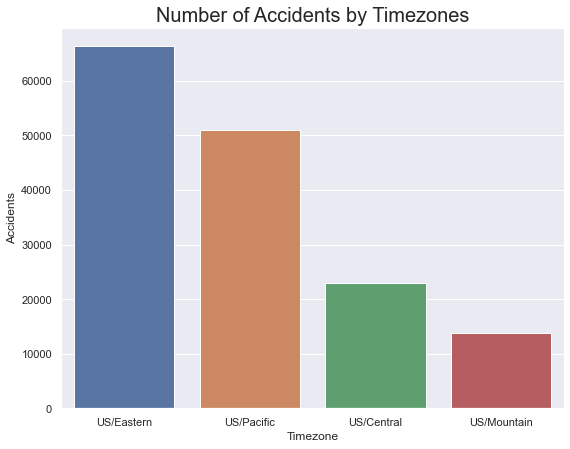

In [86]:
counts = df['Timezone'].value_counts()

sns.set(rc={'figure.figsize':(9,7)})
ax = sns.barplot(x=df.Timezone.unique(), y= counts, data=df);
ax.set(xlabel = 'Timezone', ylabel = 'Accidents')
ax.set_title('Number of Accidents by Timezones', fontsize=20)

- Highest number of accidents happen in US/Eastern Timezone
- Lowest number of accidents happen in US/Mountain Timezone

### US Traffic Accidents by State

Text(0.5, 1.0, 'US Traffic Accidents by State')

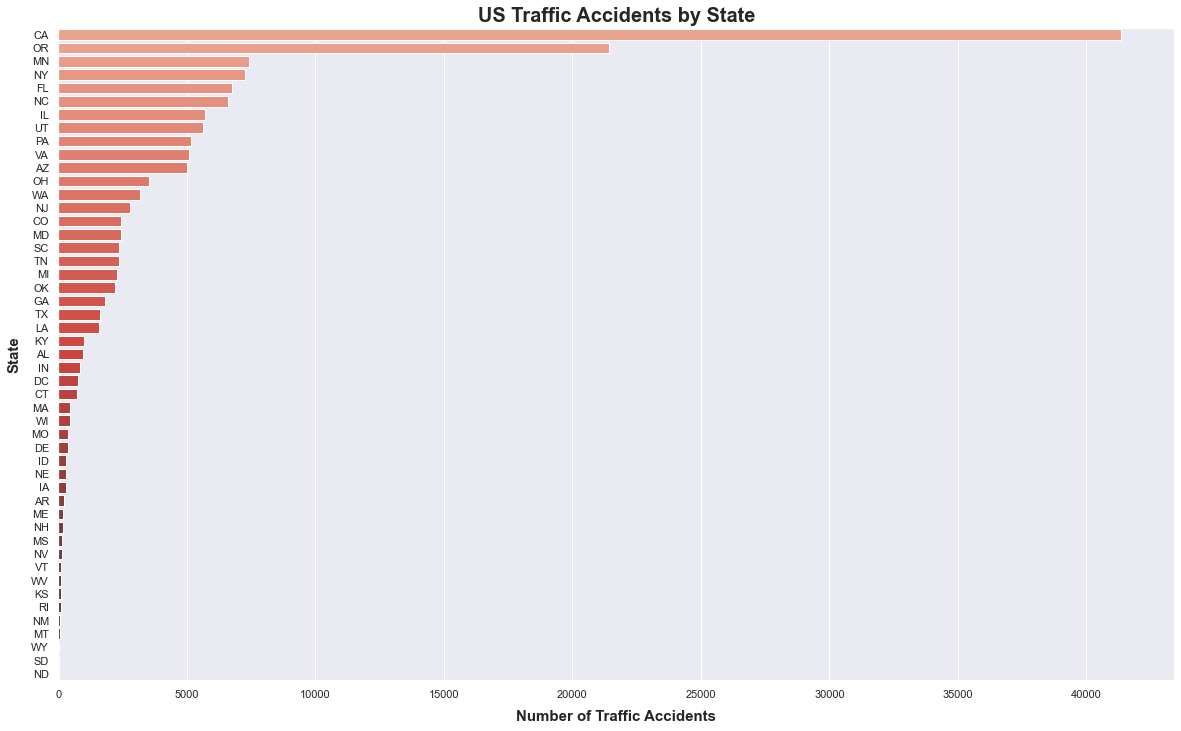

In [87]:
plt.figure(figsize=(20,12))
states = sns.countplot(y = 'State', data = df, order = df['State'].value_counts().index, palette='Reds_d')
plt.ylabel("State", labelpad=10, fontsize=15, weight = 'bold')
plt.xlabel('Number of Traffic Accidents', labelpad=10,fontsize=15, weight='bold')
plt.title('US Traffic Accidents by State',fontsize=20, weight='bold')

- More than 40000 car accidents happened in California between 2016 and 2020
- Oregon State in the second place by the highest number of accidents
- These states' data will be useful for analysis of data due to this proportion of data 

Text(0.5, 1.0, 'US Traffic Accidents by State Visualization')

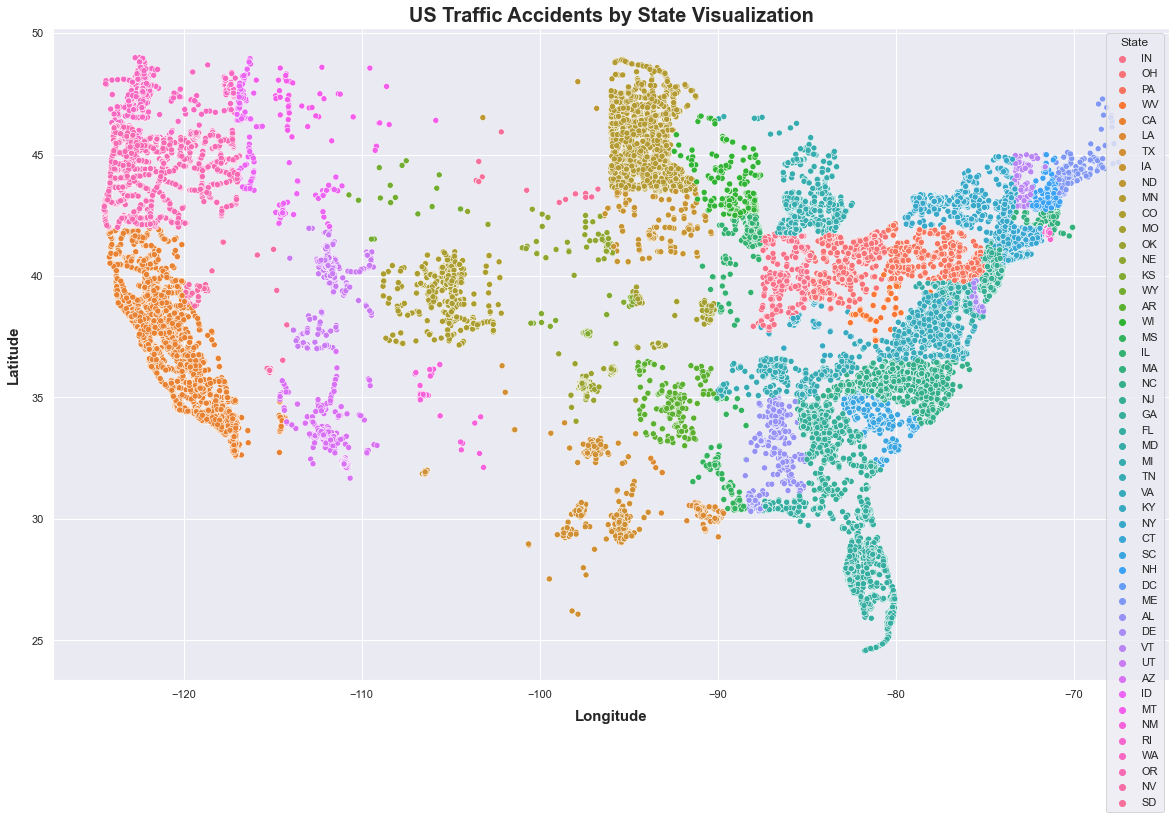

In [88]:
plt.figure(figsize=(20,12))

sns.scatterplot(x = 'Start_Lng', y = 'Start_Lat', hue= 'State', data = df)

plt.ylabel("Latitude", labelpad=10, fontsize=15, weight = 'bold')
plt.xlabel('Longitude', labelpad=10,fontsize=15, weight='bold')
plt.title('US Traffic Accidents by State Visualization',fontsize=20, weight='bold')

- Scatter plot shows that cental part less affected

### Number of accidents for California and Oregon states by severity

In [89]:
states = ['CA', 'OR']
counts = df['State'].value_counts()
CA_OR = df[df.State.isin(states)]

Text(0.5, 1.0, 'Number of accidents for each severity level')

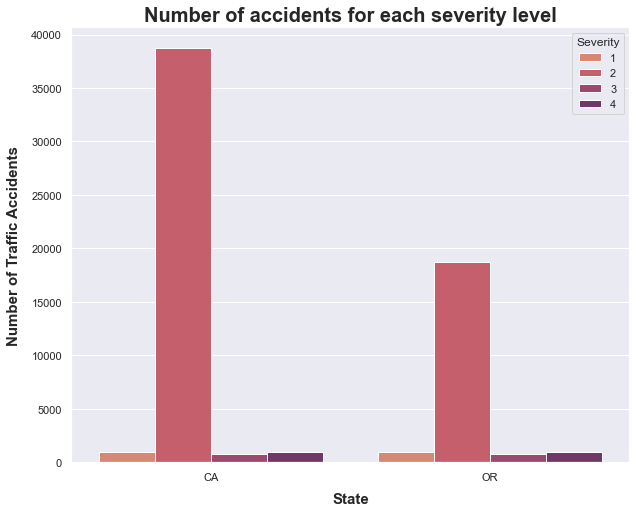

In [90]:
plt.figure(figsize = (10, 8))
sns.countplot(x = 'State', hue = 'Severity', data = CA_OR, palette = "flare")

plt.ylabel("Number of Traffic Accidents", labelpad=10, fontsize=15, weight = 'bold')
plt.xlabel('State', labelpad=10,fontsize=15, weight='bold')
plt.title('Number of accidents for each severity level',fontsize=20, weight='bold')

- Vast majority of accidents happen with 2 level of severity

### Distribution plots of weather features for California and Oregon

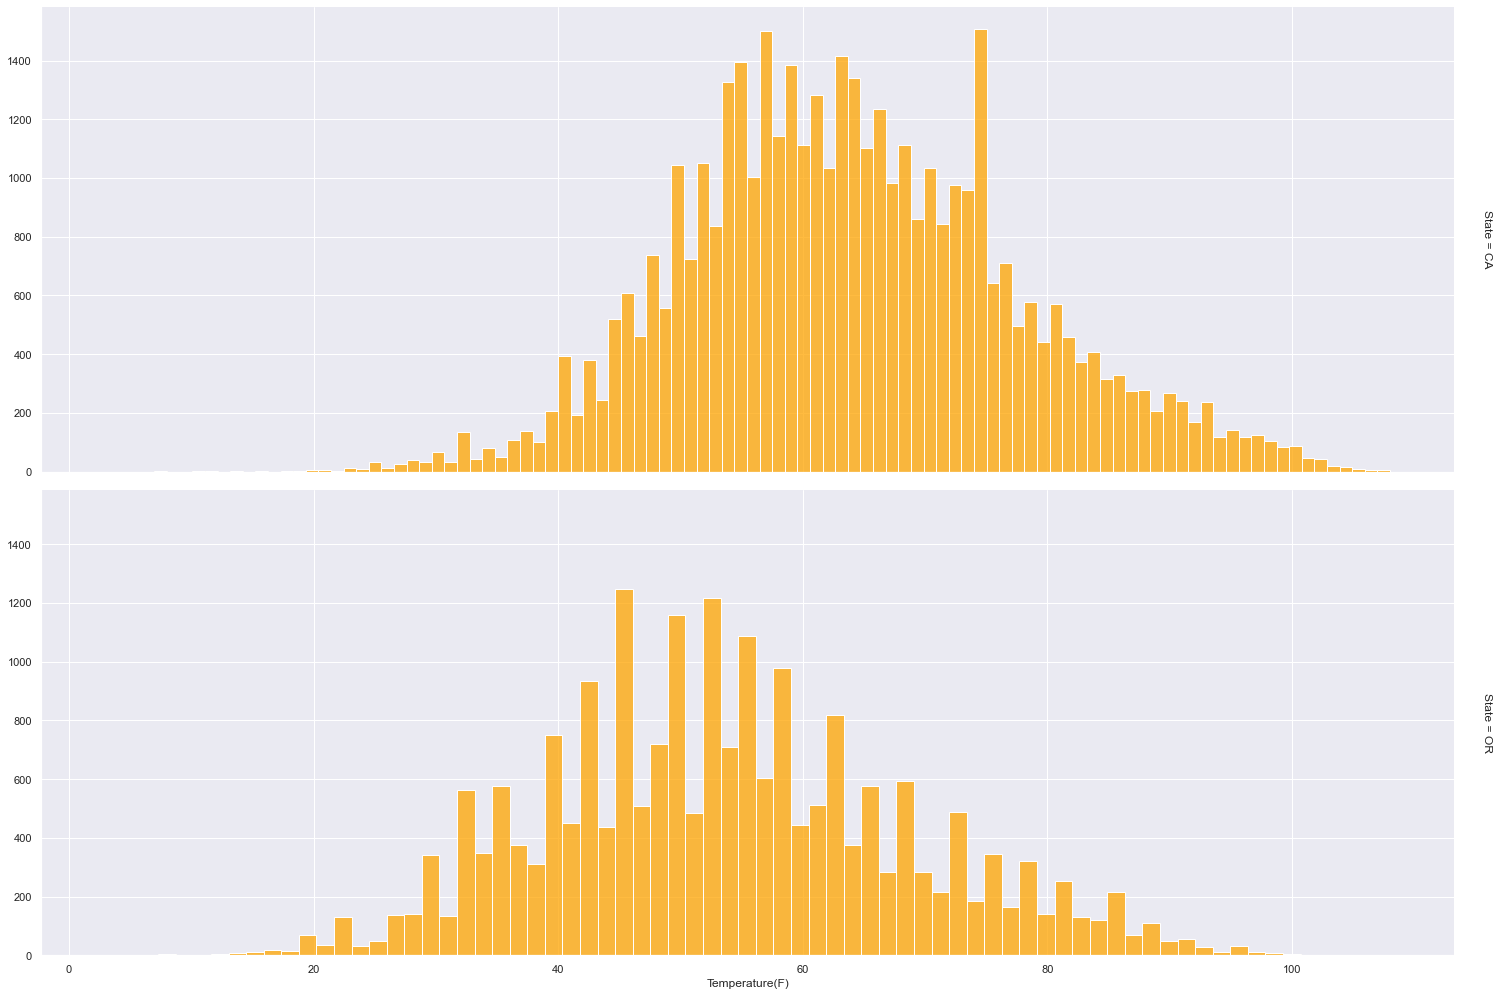

In [91]:
g = sns.FacetGrid(CA_OR, row="State", margin_titles=True,  height=7, aspect=3)
g.map(sns.histplot, "Temperature(F)", color="orange", edgecolor="white", lw=1)


### Weather conditions and the number of accidents in two states

Text(0.5, 1.0, 'Number of accidents due to weather conditions in California')

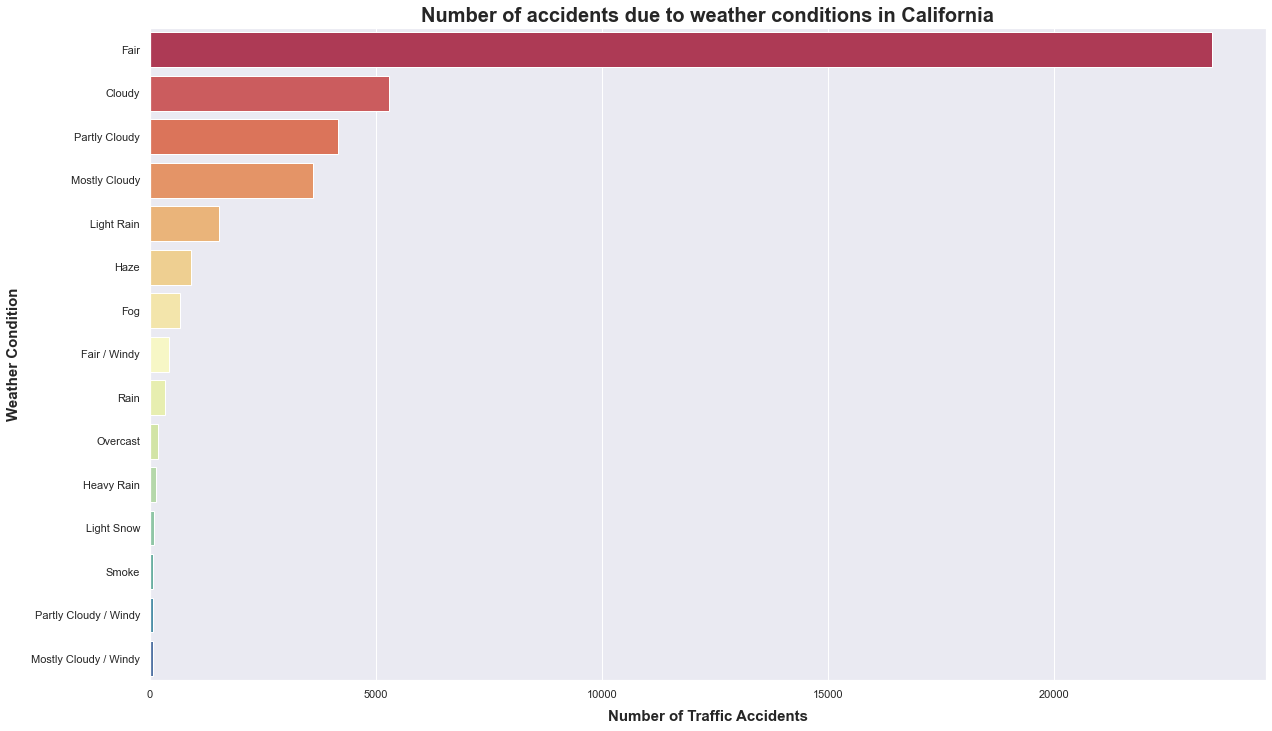

In [92]:
plt.figure(figsize=(20,12))
sns.countplot(y = 'Weather_Condition', 
              data = CA_OR[CA_OR['State'] == 'CA'], 
              order = CA_OR[CA_OR['State'] == 'CA']['Weather_Condition'].value_counts().head(15).index, 
              palette="Spectral")

plt.ylabel("Weather Condition", labelpad=10, fontsize=15, weight = 'bold')
plt.xlabel('Number of Traffic Accidents', labelpad=10,fontsize=15, weight='bold')
plt.title('Number of accidents due to weather conditions in California',fontsize=20, weight='bold')

- Most of the happened accidents were during the clear weather condition
- However, cloudy, rainy and foggy weather types are showing particular indicators which affect the number of accidents

Text(0.5, 1.0, 'Number of accidents due to weather conditions in Oregon')

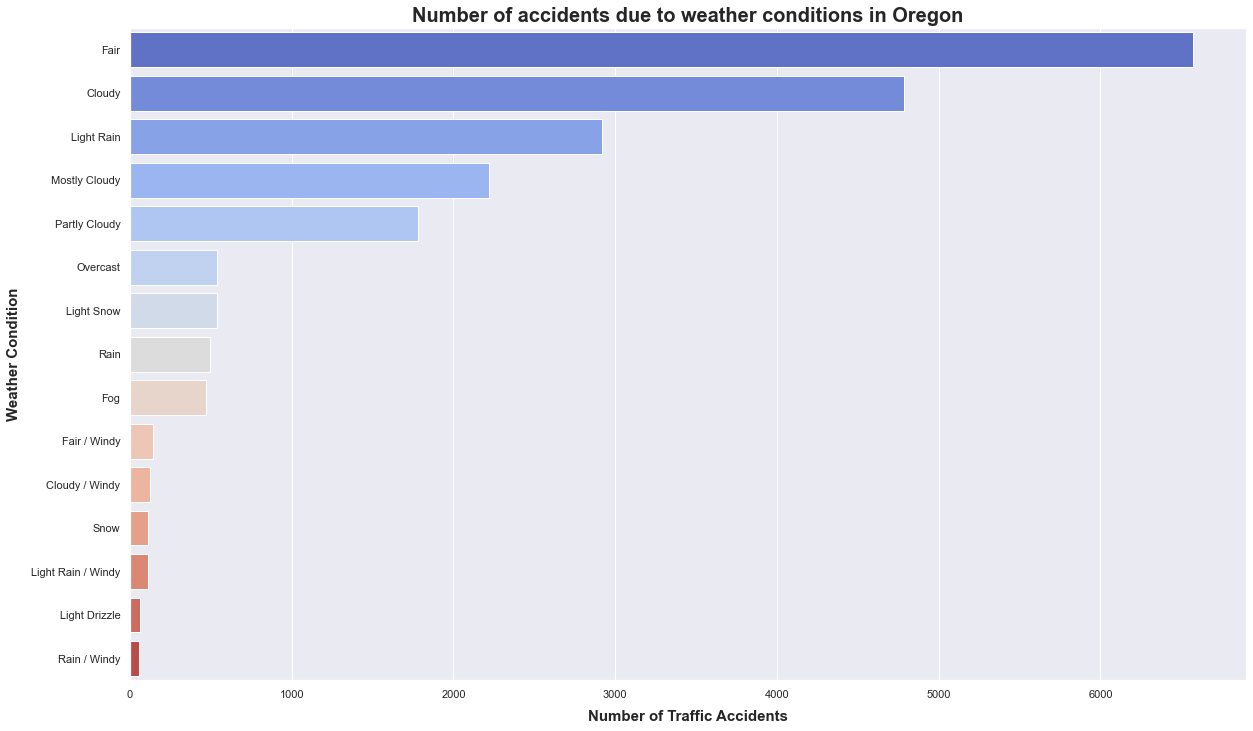

In [93]:
plt.figure(figsize=(20,12))
sns.countplot(y = 'Weather_Condition', 
              data = CA_OR[CA_OR['State'] == 'OR'], 
              order = CA_OR[CA_OR['State'] == 'OR']['Weather_Condition'].value_counts().head(15).index, 
              palette="coolwarm")

plt.ylabel("Weather Condition", labelpad=10, fontsize=15, weight = 'bold')
plt.xlabel('Number of Traffic Accidents', labelpad=10,fontsize=15, weight='bold')
plt.title('Number of accidents due to weather conditions in Oregon',fontsize=20, weight='bold')

- Oregon state's numbers counts for mostly cloudy and rainy weather conditions

### Severity indicators on the map for all states

Text(0.5, 1.0, 'US Traffic Accidents by severity visualization')

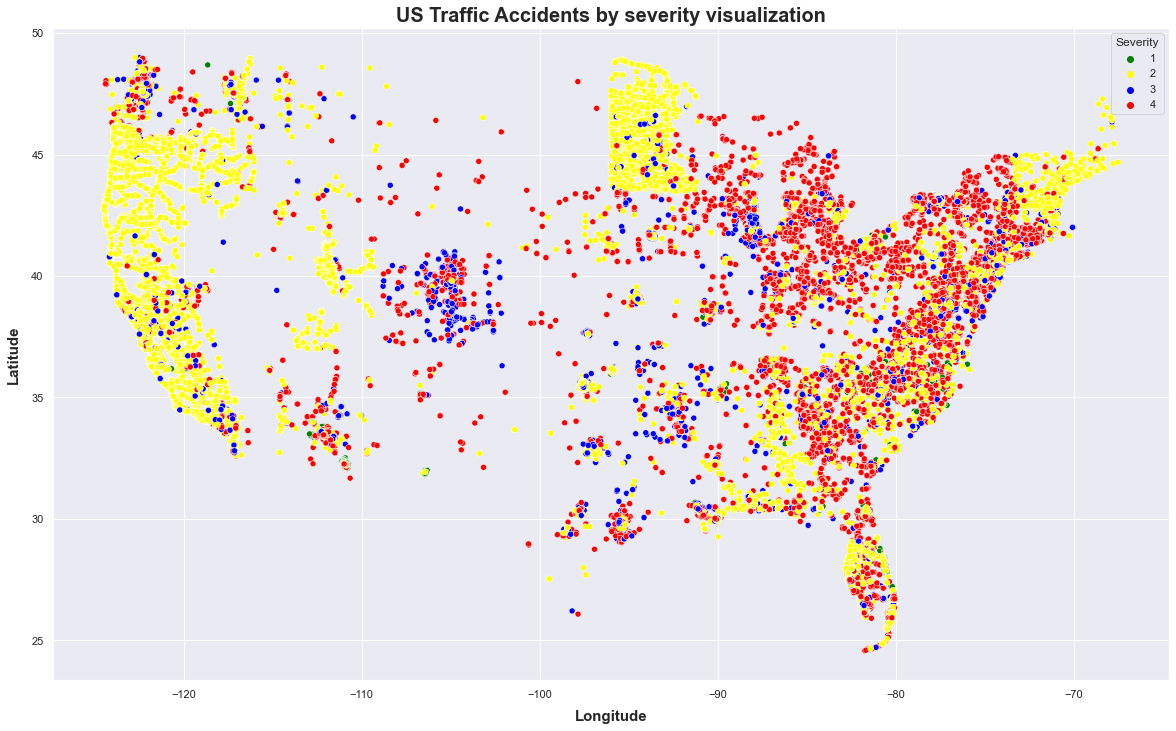

In [94]:
fig, ax = plt.subplots(figsize=(20,12))

sns.scatterplot(x='Start_Lng', y='Start_Lat', hue = 'Severity', data = df,
                palette=['green', 'yellow', 'blue', 'red'])

plt.ylabel("Latitude", labelpad=10, fontsize=15, weight = 'bold')
plt.xlabel('Longitude', labelpad=10,fontsize=15, weight='bold')
plt.title('US Traffic Accidents by severity visualization',fontsize=20, weight='bold')

- Mostly we see yellow points which is for 2nd level of severity
- Also, plot indicates that the most severe accidetns happen on the east side
- Accidents with 3rd level of severity scattered over the all States uniformly

### Severity by pie chart

2    0.675990
3    0.284803
4    0.031429
1    0.007778
Name: Severity, dtype: float64

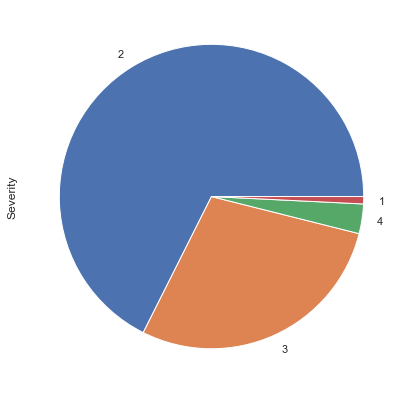

In [95]:
df_ts['Severity'].value_counts(normalize=True).plot(kind='pie')
df_ts['Severity'].value_counts(normalize=True)

- Looking for the severity, level 2 has 67%, level 3 has 28%, level 4 only has 3.1% level 1 only has 0.77%.


### Number of US accidents by severity depending on the time of the day

Text(0.5, 1.0, 'Number of accidents for each state by severity')

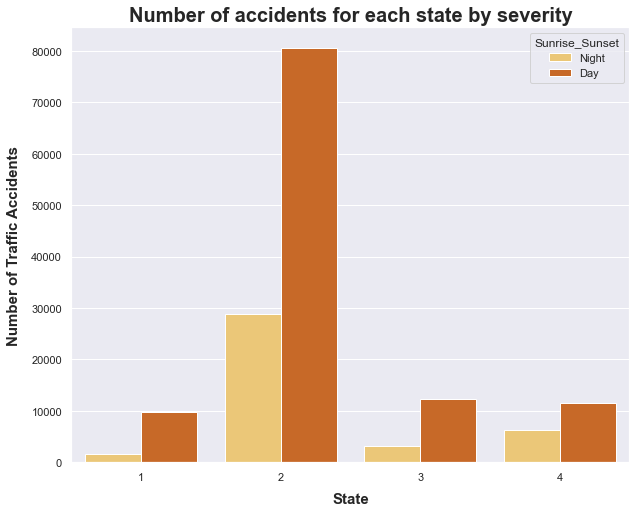

In [96]:
plt.figure(figsize = (10, 8))
sns.countplot(x = 'Severity', hue = 'Sunrise_Sunset', data = df, palette = "YlOrBr")

plt.ylabel("Number of Traffic Accidents", labelpad=10, fontsize=15, weight = 'bold')
plt.xlabel('State', labelpad=10,fontsize=15, weight='bold')
plt.title('Number of accidents for each state by severity',fontsize=20, weight='bold')

- Graph indicates how accidents' number vary by the time of the day
- Most of the accidents happen at day time for any level of severity

### Count of the accidents by the side of the road

Text(0.5, 1.0, 'Count of accidents for side of the road')

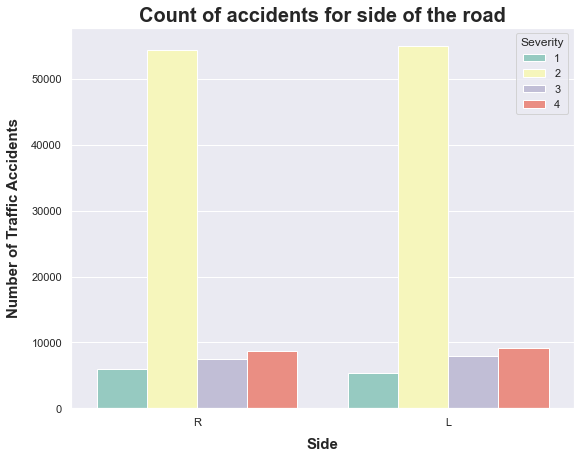

In [97]:
plt.figure(figsize = (9, 7))
sns.countplot(x = 'Side', hue = 'Severity', data = df, palette = 'Set3')

plt.ylabel("Number of Traffic Accidents", labelpad=10, fontsize=15, weight = 'bold')
plt.xlabel('Side', labelpad=10,fontsize=15, weight='bold')
plt.title('Count of accidents for side of the road',fontsize=20, weight='bold')

- there is no particular relationship in the side of the road and on the number of accidents
- both sides have similar proportions of the data for each level of severity

### Weather features and severity

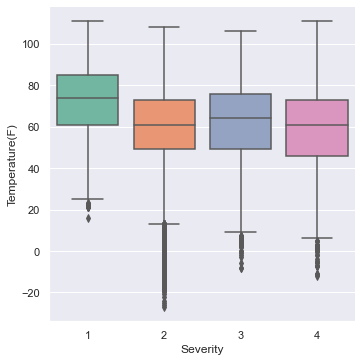

In [98]:
sns.catplot(x="Severity", y='Temperature(F)', kind="box", data=df, palette = 'Set2')

- there are many outliers in the data for the relationship of severity and temperature
- average temperature indicators similar for 2nd and 4th level severity accidents

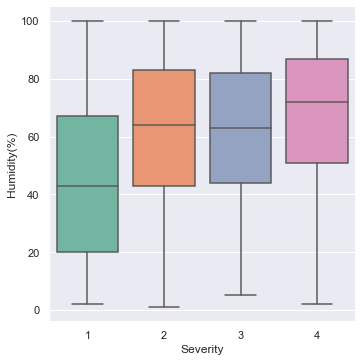

In [99]:
sns.catplot(x="Severity", y='Humidity(%)', kind="box", data=df, palette = 'Set2')

### POI - Point of interest features

In [100]:
poi = ['Amenity', 'Bump', 'Crossing','Give_Way', 'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station',
       'Stop', 'Traffic_Calming', 'Traffic_Signal']

f_dict = {}

for i in range(len(poi)):
    feature_count = df[poi[i]].value_counts()[1]
    f_dict.setdefault(poi[i], feature_count)

    
df_poi = pd.DataFrame.from_dict(f_dict, orient = 'index', 
                                columns = ['Accidents']).sort_values('Accidents', ascending = False)


Text(0.5, 1.0, 'POI features and US traffic accidents')

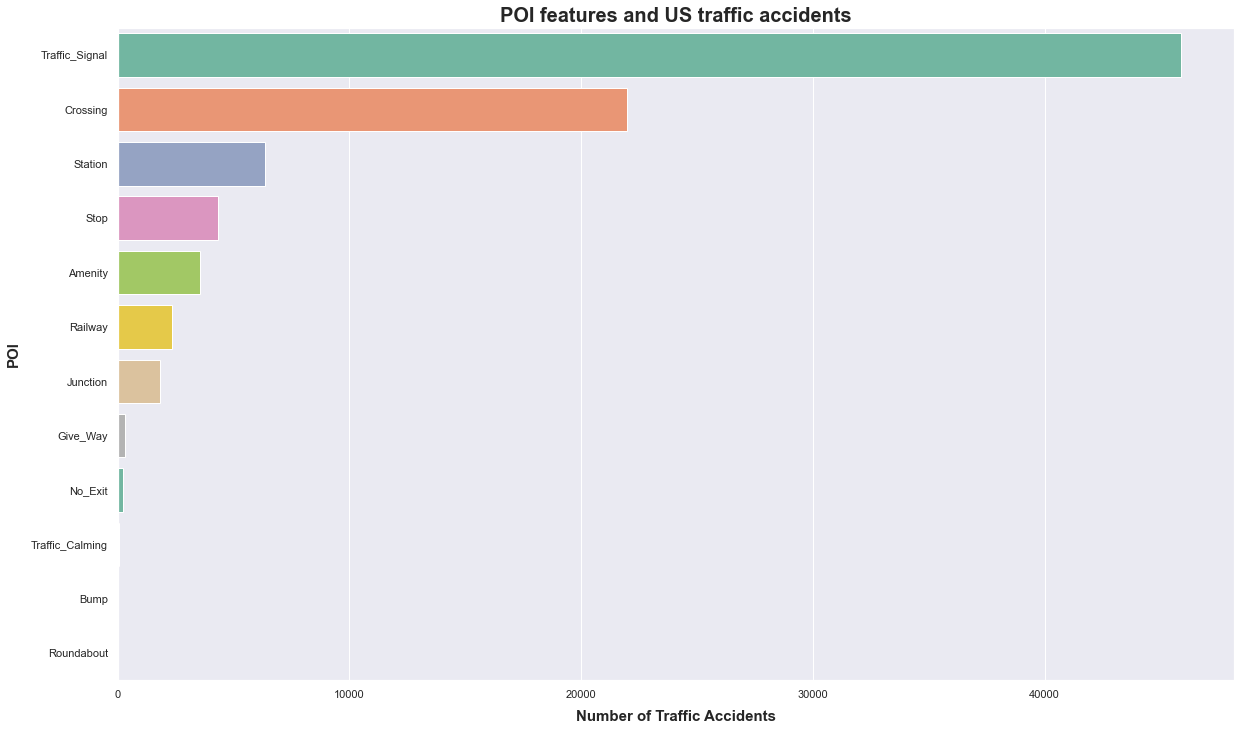

In [101]:
plt.figure(figsize=(20,12))

sns.barplot(df_poi['Accidents'], df_poi.index, palette="Set2")

plt.ylabel("POI", labelpad=10, fontsize=15, weight = 'bold')
plt.xlabel('Number of Traffic Accidents', labelpad=10,fontsize=15, weight='bold')
plt.title('POI features and US traffic accidents',fontsize=20, weight='bold')

# Time series

In [102]:
print(df_ts.groupby('Hour')['Severity'].mean())

Hour
0     2.576453
1     2.532420
2     2.554447
3     2.579331
4     2.409857
        ...   
19    2.368406
20    2.404331
21    2.438465
22    2.461724
23    2.516047
Name: Severity, Length: 24, dtype: float64


In [103]:
print(df_ts.groupby('Weekday')['Severity'].mean())

Weekday
0    2.316045
1    2.314460
2    2.314407
3    2.319499
4    2.326130
5    2.504056
6    2.510962
Name: Severity, dtype: float64


In [104]:
print(df_ts.groupby('Month')['Severity'].mean())

Month
1     2.338568
2     2.332508
3     2.331925
4     2.322071
5     2.334663
        ...   
8     2.357203
9     2.335101
10    2.318753
11    2.339566
12    2.336936
Name: Severity, Length: 12, dtype: float64


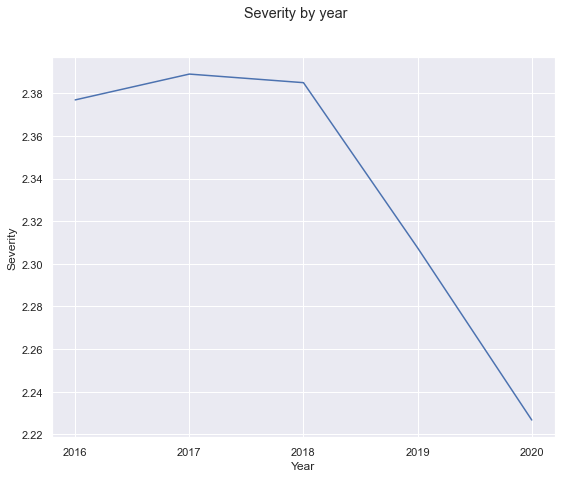

In [105]:
df_ts.groupby('Year')['Severity'].mean().plot(kind='line')
plt.xticks([2016,2017,2018,2019,2020])
plt.ylabel('Severity')
plt.suptitle('Severity by year')
plt.show()

The accidents severity declined since 2017, we can assume that people have better security awareness the improvement of infrastructure and traffic education also contribute to the decrease we have strong reason to predict the traffic severity will continue to drop

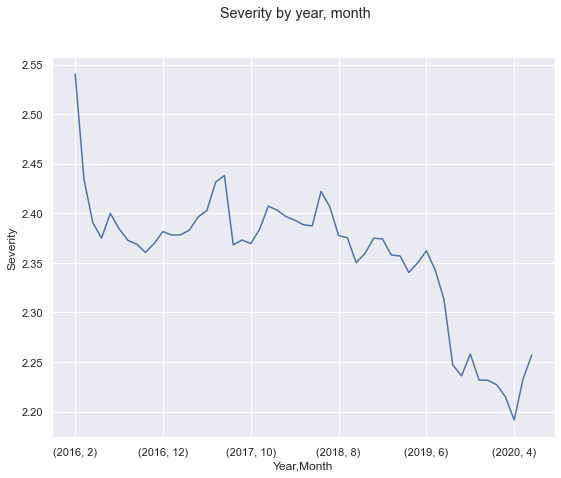

In [106]:
df_ts.groupby(by=['Year','Month'])['Severity'].mean().plot(kind='line')
plt.ylabel('Severity')
plt.suptitle('Severity by year, month')
plt.show()

From this plot, the severity declined from 2.55 to 2.4 in 2016, and keeped around 2.4 from 2016-2018.8 then it declined around to 2.35, from 2019.6 is another huge declined from 2019.6-2020.4

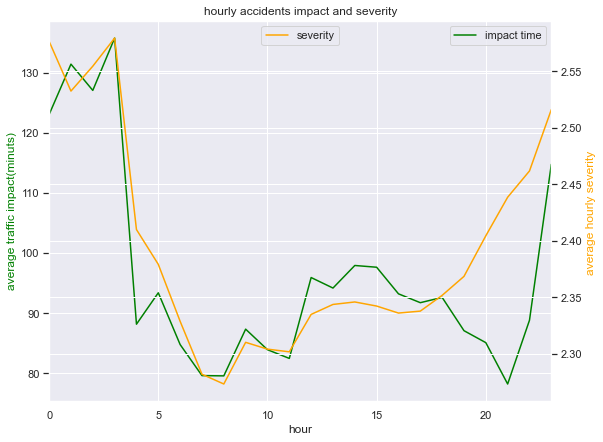

In [107]:
impact_h = df_ts.groupby('Hour')['Impact'].mean()
severity_h = df_ts.groupby('Hour')['Severity'].mean()
fig,ax=plt.subplots()
ax.plot(impact_h,color='green',label='impact time')
ax.set_xlabel('hour')
ax.set_ylabel('average traffic impact(minuts)',color='green')
ax.legend(loc='upper right')

ax2 = ax.twinx()
ax2.plot(severity_h,color='orange',label='severity')
ax2.set_ylabel('average hourly severity ',color='orange')
ax2.set_label('severity')
ax.set_title('hourly accidents impact and severity')
ax2.legend(loc='upper center')
plt.style.use('bmh')
plt.xlim((0,23))
plt.show()

The basic trend of severity and impact time on traffic overlap, night-time severity and impact is severe than daytime

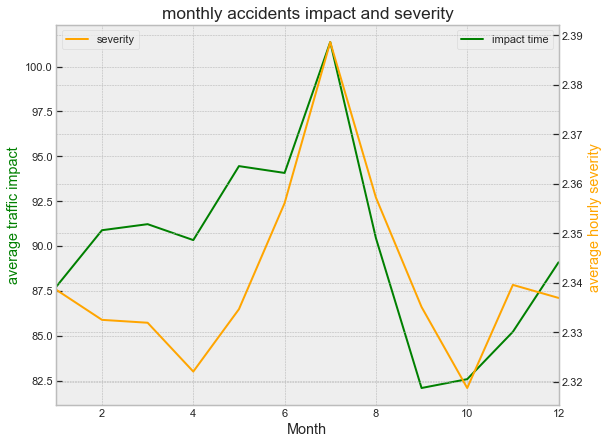

In [108]:
impact_h = df_ts.groupby('Month')['Impact'].mean()
severity_h = df_ts.groupby('Month')['Severity'].mean()
fig,ax=plt.subplots()
ax.plot(impact_h,color='green',label='impact time')
ax.set_xlabel('Month')
ax.set_ylabel('average traffic impact',color='green')
ax.legend(loc='upper right')

ax2 = ax.twinx()
ax2.plot(severity_h,color='orange',label='severity')
ax2.set_ylabel('average hourly severity ',color='orange')
ax2.set_label('severity')
ax.set_title('monthly accidents impact and severity')
ax2.legend(loc='upper left')
plt.style.use('bmh')
plt.xlim((1,12))
plt.show()

The basic trend of severity and impact time on traffic overlap, 4-7 months severity and impact is severe than 8-3 months

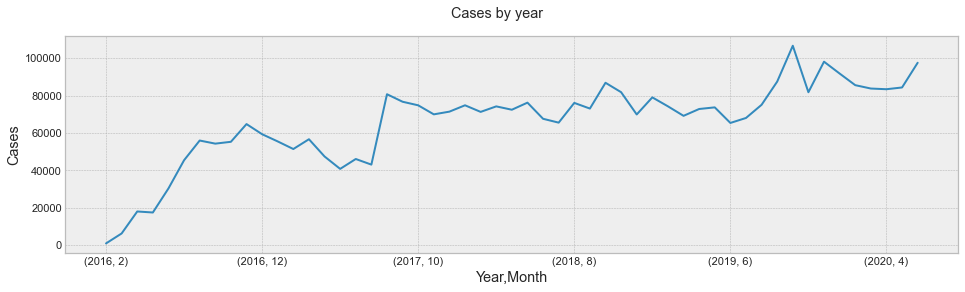

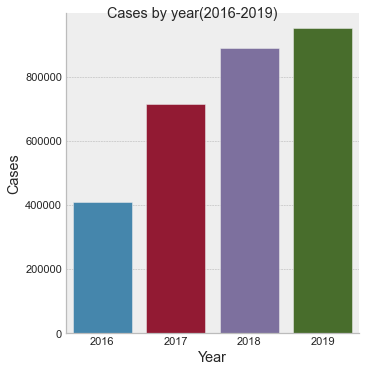

In [109]:
fig = plt.figure(figsize=(16,4))
df_ts.groupby(by=['Year','Month']).size().plot()
plt.ylabel('Cases')
plt.suptitle('Cases by year')
m = sns.catplot(x='Year',data=df_ts_clean[df_ts_clean['Year'] < 2020],kind='count')
m.fig.suptitle('Cases by year(2016-2019)')
m.set(ylabel='Cases')
plt.show()

Looking for the accidents cases with years, there is a growing trend.

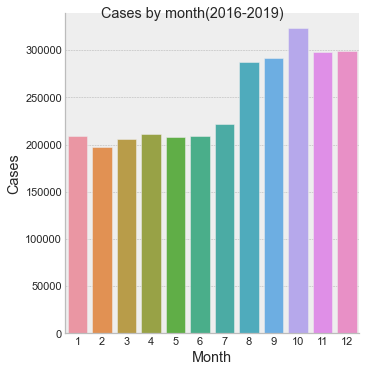

In [110]:
m1 = sns.catplot(x='Month',data=df_ts[df_ts['Year'] < 2020],kind='count')
m1.fig.suptitle('Cases by month(2016-2019)')
m1.set(ylabel='Cases')
plt.show()

Looking for the accidents cases with months, cases number is higher during 8-12 month, lower during 1-7 month the highest month is Oct. We can compare to other variables to see what makes 8-12 higher, and Oct. highest.


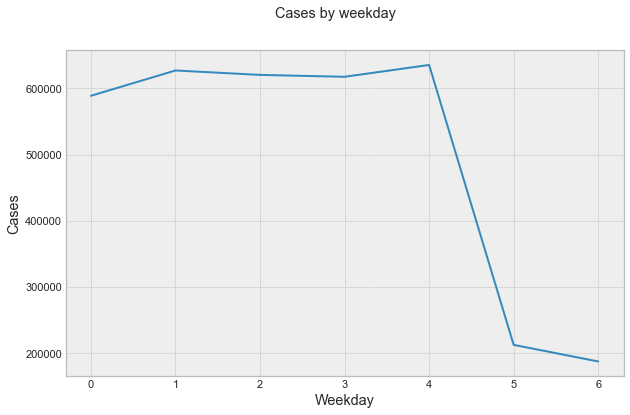

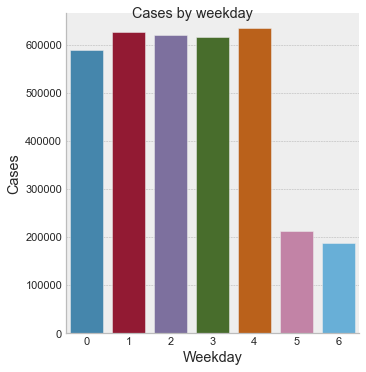

In [111]:
fig = plt.figure(figsize=(10,6))
df_ts.groupby(by=['Weekday']).size().plot()
plt.ylabel('Cases')
plt.suptitle('Cases by weekday')
m2 = sns.catplot(x='Weekday',data=df_ts,kind='count')
m2.fig.suptitle('Cases by weekday')
m2.set(ylabel='Cases')
plt.show()

During the weekday, the accidents cases are higher than weekend, compare with case by hour plot, accidents have higher chance to happened when people go out to work


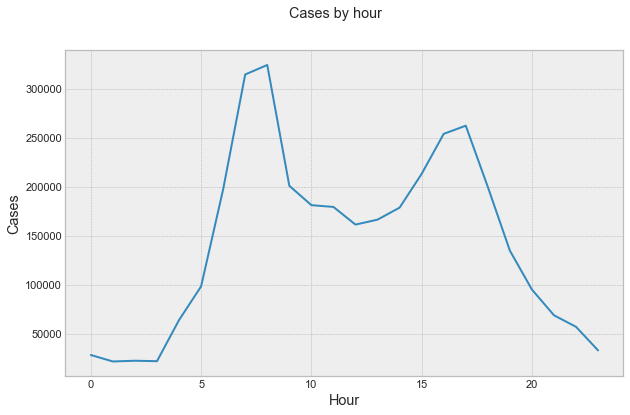

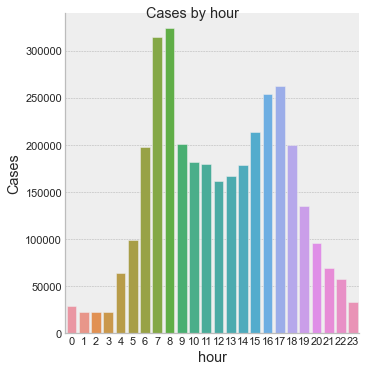

In [112]:
fig = plt.figure(figsize=(10,6))
df_ts.groupby(by=['Hour']).size().plot()
plt.ylabel('Cases')
plt.suptitle('Cases by hour')
m3 = sns.catplot(x='Hour',data=df_ts,kind='count')
m3.fig.suptitle('Cases by hour')
m3.set(ylabel='Cases',xlabel='hour')
plt.show()

We can see 2 peaks on this plot, from 7-8 and 16-17 which is the time people on commute from home to office, or back home. And there is one bottom, from 23-3. Usually, most people are in sleep during this time.

# Forecasting

In [113]:
df_forecasting = df_ts_clean[['ds',
                'y']]


In [114]:
MA_df_forecasting = df_forecasting[df_copy["State"] == "MA"]

In [115]:
MA_df_forecasting.tail()

,ds,y
ID,,
A-3512289,2019-08-21,2
A-3512823,2019-08-22,2
A-3513364,2019-08-23,2
A-3513370,2019-08-23,2
A-3513380,2019-08-23,2


In [116]:
m = Prophet(yearly_seasonality=True, weekly_seasonality=True, daily_seasonality=True, interval_width=0.95)
m.fit(MA_df_forecasting)

In [117]:
future = m.make_future_dataframe(periods=365)

In [118]:
future.tail()

,ds
1832,2021-06-26
1833,2021-06-27
1834,2021-06-28
1835,2021-06-29
1836,2021-06-30


In [119]:
future.head()

,ds
0,2016-03-23
1,2016-03-24
2,2016-03-25
3,2016-03-28
4,2016-03-29


In [120]:
forecast = m.predict(future)

In [121]:
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
1832,2021-06-26,2.145528,1.463107,3.426729,2.080579,2.213871,0.318063,0.318063,0.318063,0.229919,...,0.050408,0.050408,0.050408,0.037737,0.037737,0.037737,0.0,0.0,0.0,2.463591
1833,2021-06-27,2.145492,1.473131,3.489814,2.080312,2.214098,0.300166,0.300166,0.300166,0.229919,...,0.032644,0.032644,0.032644,0.037604,0.037604,0.037604,0.0,0.0,0.0,2.445658
1834,2021-06-28,2.145456,1.414371,3.357162,2.080046,2.214324,0.244273,0.244273,0.244273,0.229919,...,-0.023248,-0.023248,-0.023248,0.037602,0.037602,0.037602,0.0,0.0,0.0,2.389729
1835,2021-06-29,2.145421,1.360751,3.398963,2.079780,2.214551,0.256978,0.256978,0.256978,0.229919,...,-0.010666,-0.010666,-0.010666,0.037725,0.037725,0.037725,0.0,0.0,0.0,2.402398
1836,2021-06-30,2.145385,1.448932,3.460929,2.079514,2.214777,0.248732,0.248732,0.248732,0.229919,...,-0.019144,-0.019144,-0.019144,0.037957,0.037957,0.037957,0.0,0.0,0.0,2.394117


In [122]:
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2016-03-23,2.056857,1.315804,3.227271,2.056857,2.056857,0.230021,0.230021,0.230021,0.229919,...,-0.019144,-0.019144,-0.019144,0.019246,0.019246,0.019246,0.0,0.0,0.0,2.286878
1,2016-03-24,2.057204,1.379890,3.251734,2.057204,2.057204,0.237213,0.237213,0.237213,0.229919,...,-0.011243,-0.011243,-0.011243,0.018538,0.018538,0.018538,0.0,0.0,0.0,2.294417
2,2016-03-25,2.057551,1.309021,3.208626,2.057551,2.057551,0.228510,0.228510,0.228510,0.229919,...,-0.018750,-0.018750,-0.018750,0.017341,0.017341,0.017341,0.0,0.0,0.0,2.286061
3,2016-03-28,2.058593,1.333900,3.280794,2.058593,2.058593,0.218065,0.218065,0.218065,0.229919,...,-0.023248,-0.023248,-0.023248,0.011395,0.011395,0.011395,0.0,0.0,0.0,2.276658
4,2016-03-29,2.058940,1.320068,3.312014,2.058940,2.058940,0.228128,0.228128,0.228128,0.229919,...,-0.010666,-0.010666,-0.010666,0.008875,0.008875,0.008875,0.0,0.0,0.0,2.287068


In [123]:
forecast[['ds','yhat','yhat_lower','yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
1832,2021-06-26,2.463591,1.463107,3.426729
1833,2021-06-27,2.445658,1.473131,3.489814
1834,2021-06-28,2.389729,1.414371,3.357162
1835,2021-06-29,2.402398,1.360751,3.398963
1836,2021-06-30,2.394117,1.448932,3.460929


In [124]:
forecast[['ds','yhat','yhat_lower','yhat_upper']].head()

,ds,yhat,yhat_lower,yhat_upper
0,2016-03-23,2.286878,1.315804,3.227271
1,2016-03-24,2.294417,1.379890,3.251734
2,2016-03-25,2.286061,1.309021,3.208626
3,2016-03-28,2.276658,1.333900,3.280794
4,2016-03-29,2.287068,1.320068,3.312014


Text(0.5, 0.98, 'Severity forecasting')

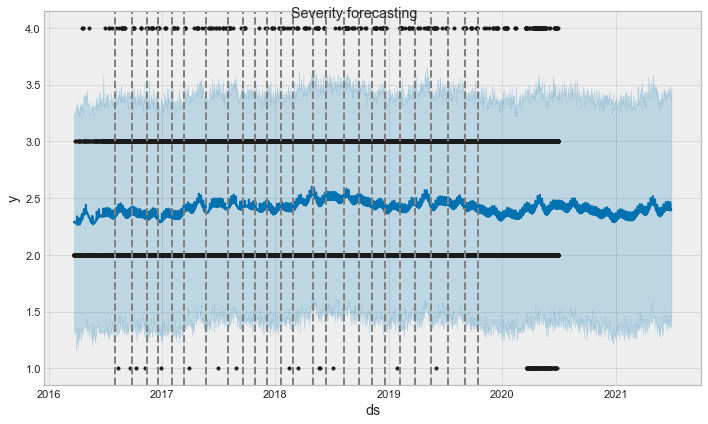

In [125]:
fig_forecast1 = m.plot(forecast)
for cp in m.changepoints:
    plt.axvline(cp, c='gray', ls='--', lw=2)
fig_forecast1.suptitle('Severity forecasting')

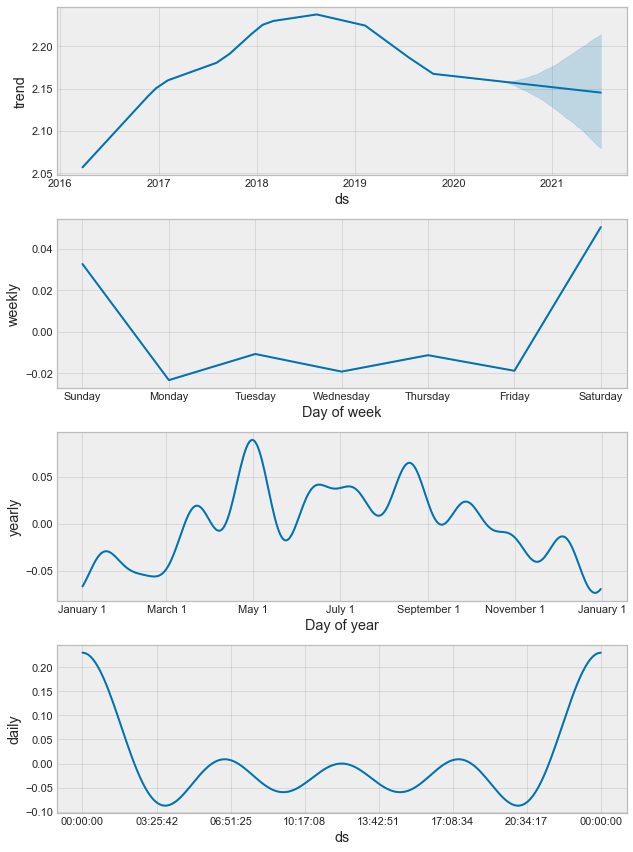

In [126]:
fig_forecast2 = m.plot_components(forecast)

- The first plot is looking in to the future, and the uncertainty is increasing as it goes along.
- The second plot is weekly seasonality, highest number hits at Saturday, then it goes down
- For the 3rd plot, which is yearly seasonality. Starting from a low level in January, it reached its highest point in early May and a downward trend throughout May. There was a certain increase from June to July, and a larger increase was ushered in late August. Since then it has been on a downward trend until the end of the year.
- Last one is daily seasonality.


## Linear models

In [127]:
# Massachusetts data
MA_df = df_copy[df_copy["State"] == "MA"].copy()



In [128]:
# choose the features for linear regression
lr_cols = ["Severity","Temperature(F)",'Humidity(%)','Pressure(in)','Visibility(mi)','Wind_Speed(mph)',"Sunrise_Sunset","YMD"]
lr_df = MA_df[lr_cols].copy()
lr_df.dropna(inplace=True)
lr_df.shape

(33312, 8)

In [129]:
# create daily variables

# transform the Sunrise_Sunset into binary variable
#lr_df.loc[lr_df["Sunrise_Sunset"] == "Day","Sunrise_Sunset"] = 1
#lr_df.loc[lr_df["Sunrise_Sunset"] == "Night","Sunrise_Sunset"] = 0

# create daily group
lr_daily_group = lr_df.groupby("YMD")

lr_daily_accident_count = lr_daily_group["Severity"].count()
lr_daily_severity_sum = lr_daily_group["Severity"].sum()
lr_daily_temp_mean = lr_daily_group["Temperature(F)"].mean()
lr_daily_hmd = lr_daily_group['Humidity(%)'].mean()
lr_daily_pres = lr_daily_group['Pressure(in)'].mean()
lr_daily_vis = lr_daily_group['Visibility(mi)'].mean()
lr_daily_wind = lr_daily_group['Wind_Speed(mph)'].mean()
lr_daily_sun = lr_daily_group["Sunrise_Sunset"].sum()

lr_daily_data = pd.DataFrame({
    "Num" : lr_daily_accident_count,
    "Severity" : lr_daily_severity_sum,
    "Temp" : lr_daily_temp_mean,
    "Humidity" : lr_daily_hmd,
    "Pressure" : lr_daily_pres,
    "Visibility" : lr_daily_vis,
    "Wind_Speed" : lr_daily_wind,
    "Sun" : lr_daily_sun
})

lr_daily_data.head(10)

,Num,Severity,Temp,Humidity,Pressure,Visibility,Wind_Speed,Sun
YMD,,,,,,,,
2016-03-24,5,10,37.420000,50.800000,30.248000,10.000000,15.640000,NightNightDayDayDay
2016-03-25,3,7,45.333333,84.666667,29.813333,4.666667,9.600000,DayDayDay
2016-03-28,7,15,41.114286,88.000000,29.791429,6.285714,8.400000,DayDayDayDayDayDayDay
2016-03-29,6,12,43.133333,56.333333,29.683333,10.000000,18.433333,DayDayDayDayDayDay
2016-03-30,3,6,42.633333,36.666667,30.280000,10.000000,10.000000,DayDayDay
2016-03-31,3,6,62.000000,44.333333,29.910000,10.000000,23.800000,NightDayDay
2016-04-04,9,19,24.488889,81.222222,30.011111,2.288889,7.066667,NightDayDayDayDayDayDayDayNight
2016-04-05,7,14,26.128571,42.714286,30.250000,10.000000,10.042857,DayDayDayDayDayDayDay
2016-04-07,8,19,54.312500,83.375000,29.815000,6.812500,17.700000,DayDayDayDayDayDayDayDay


In [130]:
# standardization by hand

def stand_trans(x):
    x = x-min(x)
    x /= max(x)
    return x

lr_daily_data["Visibility"] /= 10

lr_daily_data["Wind_Speed"] = stand_trans(lr_daily_data["Wind_Speed"])
lr_daily_data["Pressure"] = stand_trans(lr_daily_data["Pressure"])
lr_daily_data["Temp"] = stand_trans(lr_daily_data["Temp"])
lr_daily_data["Humidity"] /= 100

# proportion of accidents happen at daytime
lr_daily_data["Sun"] = lr_daily_data["Sun"] / lr_daily_data["Num"]

lr_daily_data.head(10)

TypeError: unsupported operand type(s) for /: 'str' and 'int'

In [ ]:
# correlation coefficients
lr_daily_data.corr()

In [ ]:
# doing linear standardization has no influence to the correlation coefficient
sns.pairplot(lr_daily_data)

In [ ]:
# heatmap
plt.figure(figsize = (12,8))
sns.heatmap(lr_daily_data.corr(),cbar=True, annot=True,square=True,
                 fmt='.2f',annot_kws={'size': 15},
                 yticklabels=lr_cols,xticklabels=lr_cols);

### Linear regression

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split, cross_val_score

Using weather data to predict the proportion of accidents happened at daytime

This time I choose only one feature: temperature

In [ ]:
linear_features = ["Temp","Humidity","Pressure","Visibility","Wind_Speed"]

X = lr_daily_data[["Temp"]]
y = lr_daily_data["Sun"]

In [ ]:
lr = LinearRegression()

# cross-val-score
scores = cross_val_score(lr,X,y)
np.mean(scores)

In [ ]:
# showing the linear regression model
x_points = np.linspace(0,1,100)

lr.fit(X,y)
sns.set_style("darkgrid")
plt.figure(figsize=(12,8))
sns.scatterplot(x="Temp",y="Sun",data = lr_daily_data,label="samples")
plt.plot(x_points,lr.predict(x_points[:,np.newaxis]),color="red",label="predict")
plt.legend(loc="lower right")

### Polynomial Regression

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
mean_scores = []
for i in range(1,15):
    poly = PolynomialFeatures(degree=i)
    X2 = poly.fit_transform(X)
    lr = LinearRegression()
    scores = cross_val_score(lr,X2,y)
    mean_scores.append(np.mean(scores))  

In [ ]:
for i in range(14):
    print("Degree = {0}, Score = {1:.4f}".format(i+1,mean_scores[i]))

In [ ]:
# Let degree to be 3
poly = PolynomialFeatures(degree=3)
lr = LinearRegression()
pipeline = Pipeline([("polynomial_features", poly),
                         ("linear_regression", lr)])
pipeline.fit(X, y)

x_points = np.linspace(0,1,100)

sns.set_style("darkgrid")
plt.figure(figsize=(12,8))
sns.scatterplot(x="Temp",y="Sun",data = lr_daily_data,label="samples")
plt.plot(x_points,pipeline.predict(x_points[:,np.newaxis]),color="red",label="predict")
plt.legend(loc="best")
plt.title("Degree {}\nMSE = {:.2f}$\pm$ {:.2f}".format(
        3, -scores.mean(), scores.std()))

There is a little improvement by using polynomial regression, but I think this is not the best method, maybe using a log function is better.

Predict the visualizaion by humidity

In [ ]:
Humid = lr_daily_data[["Humidity"]]
Visib = lr_daily_data["Visibility"]

X = np.array(Humid)
y = np.array(Visib)

mean_scores = []
for i in range(1,11):
    poly = PolynomialFeatures(degree=i)
    Humid2 = X2 = poly.fit_transform(Humid)
    lr = LinearRegression()
    scores = cross_val_score(lr,Humid2,Visib)
    mean_scores.append(np.mean(scores))  
    
for i in range(10):
    print("Degree = {0}, Score = {1:.4f}".format(i+1,mean_scores[i]))

In [ ]:
# plotting

poly = PolynomialFeatures(degree=3)
lr = LinearRegression()
pipeline = Pipeline([("polynomial_features", poly),
                         ("linear_regression", lr)])
pipeline.fit(X, y)

scores = cross_val_score(pipeline, X, y,
                             scoring="neg_mean_squared_error", cv=10)

x_points = np.linspace(0.2,1,1000)

sns.set_style("darkgrid")
plt.figure(figsize=(12,8))
sns.scatterplot(x="Humidity",y="Visibility",data = lr_daily_data,label="samples")
plt.plot(x_points,pipeline.predict(x_points[:,np.newaxis]),color="red",label="predict")
plt.legend(loc="best")
plt.title("Degree {}\nMSE = {:.4f}$\pm$ {:.4f}".format(
        3, -scores.mean(), scores.std()))

### Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [ ]:
lor_df = MA_df.copy()
lor_df.ffill(inplace = True)
lor_df.bfill(inplace=True)

In [ ]:
# simplify Severity into 2 groups
lor_df.loc[lor_df["Severity"] <= 2,"Severity"] = 0
lor_df.loc[lor_df["Severity"] >= 3,"Severity"] = 1

In [ ]:
lor_df.Severity.value_counts()

The number of two classes are inbalanced, and we must handel this problem, otherwise the model will be inaccurate.

I choose a simple way: using repetitive rows to fill the data set

In [ ]:
# length of the data set
n = len(lor_df.Severity)
lor_df_type1 = lor_df[lor_df.Severity == 1]
n1 = len(lor_df_type1.Severity)

# randomly choose the rows and then fill the data set
j = lor_df_type1.iloc[np.random.randint(n1,size = n-2*n1)]
lor_df = lor_df.append(j)

In [ ]:
lor_df.Severity.value_counts()

In [ ]:
# create the model
y = lor_df["Severity"].copy()
X = lor_df[numerical_features + binary_features].copy()
lor = LogisticRegression(random_state=0)

In [ ]:
# cross validation
scores = cross_val_score(lor,X,y)

np.mean(scores)

In [ ]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)
lor.fit(X_train,y_train)
y_pred=lor.predict(X_test)
accuracy_score(y_test, y_pred)

## Clustering

Jiaqi Liu's part:

I think it's a good idea to make a clustering model on the "state" data, because we can split the 51 states into different groups (clusters), and put forward some conclusions or suggestions to each state group.

The variables I choose is the proportion of accidents that are severe (greater than 2), and the proportion of accidents that happen at daytime.

In [ ]:
# Simplify the severity variable into 2 classes
clu_df = df_copy
clu_df.loc[clu_df["Severity"] <= 2,"Severity"] = 0
clu_df.loc[clu_df["Severity"] >= 3,"Severity"] = 1

# transform the Sunrise_Sunset into binary variable
clu_df.loc[clu_df["Sunrise_Sunset"] == "Day","Sunrise_Sunset"] = 1
clu_df.loc[clu_df["Sunrise_Sunset"] == "Night","Sunrise_Sunset"] = 0

In [ ]:
# calculating the 2 variables of each state
state_group = clu_df.groupby("State")
state_info = (state_group["Severity"].sum() / state_group["Severity"].count()).reset_index()
state_info.loc[:,"at_daytime"] = np.array(state_group["Sunrise_Sunset"].sum() / state_group["Sunrise_Sunset"].count())
state_info.head()

In [ ]:
# ploting the data

plt.figure(figsize=(12,8))
sns.set_style("darkgrid")
sns.scatterplot(x="Severity",y="at_daytime",data=state_info)
for i in range(len(state_info.Severity)):
    plt.text(x=state_info.loc[i,"Severity"],y=state_info.loc[i,"at_daytime"],s=state_info.loc[i,"State"],
            fontsize = 12)
plt.xlabel("Proportion of severe accidents")
plt.ylabel("Proportion of accidents happen at daytime")
plt.title("Relationship of severity and at_daytime of each state")

In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.datasets import make_blobs, make_moons

In [ ]:
# feature
X = state_info[["Severity","at_daytime"]]

In [ ]:
# model
kmeans = KMeans(n_clusters=4, random_state=0)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

In [ ]:
# center 
centers = kmeans.cluster_centers_
print(centers)

In [ ]:
# plotting
X1 = np.array(X)
plt.figure(figsize=(12,8))
sns.set_style("darkgrid")
plt.scatter(X1[:, 0], X1[:, 1], c=y_kmeans, s=32, cmap="viridis")
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=128, alpha=0.8)
for i in range(len(state_info.Severity)):
    plt.text(x=state_info.loc[i,"Severity"],y=state_info.loc[i,"at_daytime"],s=state_info.loc[i,"State"],
            fontsize = 12)
plt.xlabel("Proportion of severe accidents")
plt.ylabel("Proportion of accidents happen at daytime")
plt.title("K means clustering")

To find a best number of clusters, I utilize Davies-Bouldin Index:

$DBI=\frac{1}{k}\sum_{i=1}^k\max \limits_{j\neq i}\left(\frac{avg\left(C_i\right)+avg\left(C_j\right)}{d_{cen}\left(\mu_i ,\mu_j \right)}\right)$

In [ ]:
from sklearn.metrics import davies_bouldin_score

In [ ]:
n_clusters = np.arange(2, 20)

models = [KMeans(n,random_state=0).fit(X)
         for n in n_clusters]

metrics = [davies_bouldin_score(X,model.predict(X)) for model in models]

In [ ]:
fig, ax = plt.subplots(figsize=(9,7))

ax.plot(n_clusters, metrics, label='DBI')

plt.legend(loc='best')
plt.xlabel('n_clusters');

A good model should have smaller DBI, so choosing 4 as the number of cluster might be the best, since too many clusters could lead to overfitting.

In [ ]:
df_clustering = df_ts_clean[['YMD',
                'City',
                'Start_Lat',
                'Start_Lng',
                'Impact',
                'Severity']]

In [ ]:
fig, ax = plt.subplots(figsize=(26,14))
ax.scatter(df_clustering[df_clustering['Severity']==1].Start_Lng+0.3,
           df_clustering[df_clustering['Severity']==1].Start_Lat-0.8,
           zorder=1, alpha=0.7, c='blue', s=4)
ax.scatter(df_clustering[df_clustering['Severity']==2].Start_Lng+0.3,
           df_clustering[df_clustering['Severity']==2].Start_Lat-0.8,
           zorder=1, alpha=0.7, c='green', s=3)
ax.scatter(df_clustering[df_clustering['Severity']==3].Start_Lng+0.3,
           df_clustering[df_clustering['Severity']==3].Start_Lat-0.8,
           zorder=1, alpha=0.7, c='orange', s=2)
ax.scatter(df_clustering[df_clustering['Severity']==4].Start_Lng+0.3,
           df_clustering[df_clustering['Severity']==4].Start_Lat-0.8,
           zorder=1, alpha=0.7, c='red', s=1)
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_title('US Accidents by severity')

# TX Kmeans

In [ ]:
test_df = df_ts_clean[df["State"] == "TX"]

In [ ]:
X2 = test_df[['Start_Lng', 'Start_Lat']]

In [ ]:
X_test = X2
fig_x = 20
fig_y = 16

In [ ]:
fig, ax = plt.subplots(figsize = (fig_x,fig_y))
ax.scatter(test_df[test_df['Severity']==1].Start_Lng+0.3,
           test_df[test_df['Severity']==1].Start_Lat-0.8,
           zorder=1, alpha=0.7, c='blue', s=4)
ax.scatter(test_df[test_df['Severity']==2].Start_Lng+0.3,
           test_df[test_df['Severity']==2].Start_Lat-0.8,
           zorder=1, alpha=0.7, c='green', s=3)
ax.scatter(test_df[test_df['Severity']==3].Start_Lng+0.3,
           test_df[test_df['Severity']==3].Start_Lat-0.8,
           zorder=1, alpha=0.7, c='orange', s=2)
ax.scatter(test_df[test_df['Severity']==4].Start_Lng+0.3,
           test_df[test_df['Severity']==4].Start_Lat-0.8,
           zorder=1, alpha=0.7, c='red', s=1)
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_title('TX Accidents by severity')

In [ ]:
n_test = 6

In [ ]:
kmeans = KMeans(n_clusters=n_test, random_state=0)
kmeans.fit(X_test)
y_kmeans = kmeans.predict(X_test)


In [ ]:
fig, ax = plt.subplots(figsize = (fig_x,fig_y))
ax.scatter(test_df.Start_Lng+0.3,
           test_df.Start_Lat-0.8,
           c=y_kmeans,
           zorder=1, alpha=0.7, s=4)
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_title('TX Accidents cluster')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='green', s=100, alpha=0.7)

# TX Elbow Method

In [ ]:
kmeans.inertia_

In [ ]:
# Elbow method for optimal number of clusters

n_clusters = np.arange(1, 12)

models = [KMeans(n,random_state=0).fit(X2)
         for n in n_clusters]

metrics = [model.inertia_ for model in models]
metrics

In [ ]:
fig, ax = plt.subplots(figsize=(9,7))

ax.plot(n_clusters, metrics, label='Interia')

plt.legend(loc='best')
plt.xlabel('n_clusters');

